# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

##### Carregando Pacotes:

In [608]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import warnings

%matplotlib inline

In [610]:
warnings.filterwarnings('ignore')

##### Leitura do DataFrame:

In [612]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

##### Análise dos metadados do DataFrame:

In [616]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['non_null'] = df.count()
metadados['missing'] = df.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100) 
metadados['valores_unicos'] = df.nunique()

metadados

,dtypes,non_null,missing,perc_missing,valores_unicos
Unnamed: 0,int64,15000,0,0.0,15000
data_ref,object,15000,0,0.0,15
id_cliente,int64,15000,0,0.0,9845
sexo,object,15000,0,0.0,2
posse_de_veiculo,bool,15000,0,0.0,2
posse_de_imovel,bool,15000,0,0.0,2
qtd_filhos,int64,15000,0,0.0,8
tipo_renda,object,15000,0,0.0,5
educacao,object,15000,0,0.0,5
estado_civil,object,15000,0,0.0,5


Dentro do DataFrame a variável ```tempo_emprego``` é a única que possui missing values, vale então verificar sua distribução.

##### Verificando a distribuição dos valores da variável ```tempo_emprego```:

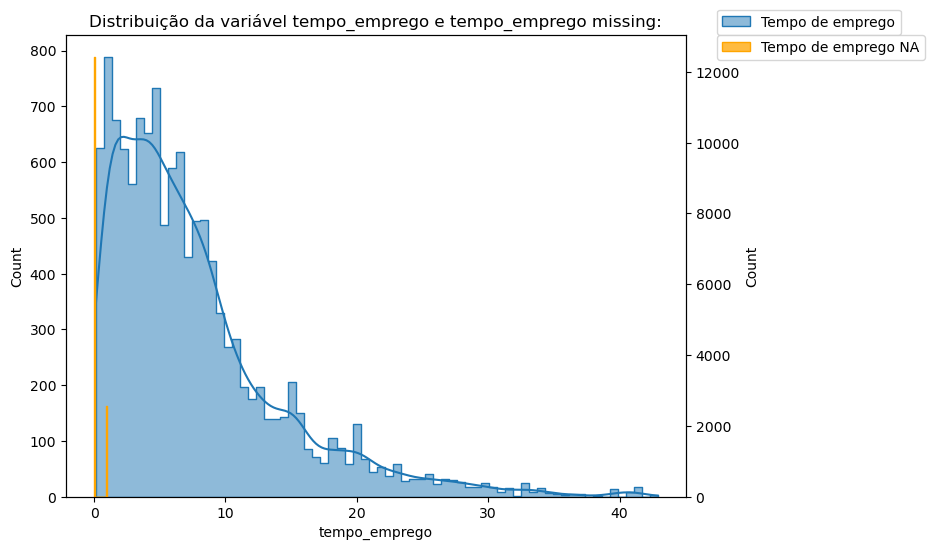

In [618]:
df['tempo_emprego_na'] = df['tempo_emprego'].isna()
plt.rc('figure', figsize=(8, 6))

ax = sns.histplot(data=df,
             x='tempo_emprego',
             kde=True,
             element='step',
             label='Tempo de emprego'
            )

ax2 = ax.twinx()
ax2= sns.histplot(data=df,
             x='tempo_emprego_na',
             element='step',
             color ='Orange',
             label='Tempo de emprego NA'
            )
plt.title('Distribuição da variável tempo_emprego e tempo_emprego missing:')
ax2.legend(bbox_to_anchor = (1.05, 1),
           loc = 2,
           borderaxespad = 0
           )

ax.legend(bbox_to_anchor = (1.05, 1),
          loc = 3,
          borderaxespad = 0
         )

De acordo com o gráfico e os metadados avaliados acima os missing values para a variável ```tempo_emprego``` não estão gerando desbalanço nos dados, portato vale apenas os deletar.

##### Função para filtrar o DataFrame:

In [620]:
def filter(df):
    df.drop(columns=['Unnamed: 0','tempo_emprego_na', 'id_cliente'], inplace=True)
    df.dropna(inplace=True)
    print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')
    df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(str)
    df['posse_de_imovel'] = df['posse_de_imovel'].astype(str)
    
    return df.head()

In [622]:
filter(df)

Linhas: 12427 
Colunas: 13


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


##### Verifica a nova distribuição da variável ```tempo_emprego```:

Text(0.5, 1.0, 'Distribuição da variável tempo_emprego sem missing:')

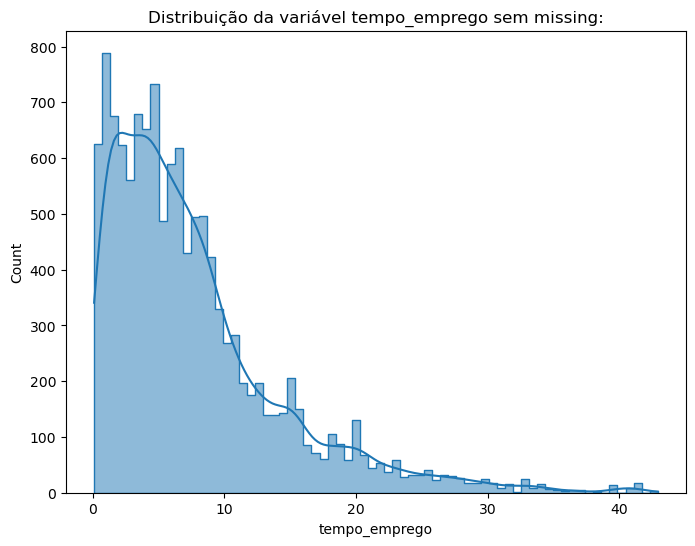

In [624]:
sns.histplot(data=df,
             x='tempo_emprego',
             kde=True,
             element='step',
            )
plt.title('Distribuição da variável tempo_emprego sem missing:')


##### Metadados para DataFrame filtrado e valor de maior frequência das variáveis:

In [626]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['non_null'] = df.count()
metadados['missing'] = df.isnull().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100) 
metadados['valores_unicos'] = df.nunique()
freq_dict = {}
for nome, valores in df.items():
    freq_dict[nome] = valores.mode()[0]
freq = pd.DataFrame.from_dict(freq_dict, orient = 'index', columns=['freq'])
metadados['maior_freq'] = freq['freq']

metadados

,dtypes,non_null,missing,perc_missing,valores_unicos,maior_freq
data_ref,object,12427,0,0.0,15,2015-09-01
sexo,object,12427,0,0.0,2,F
posse_de_veiculo,object,12427,0,0.0,2,False
posse_de_imovel,object,12427,0,0.0,2,True
qtd_filhos,int64,12427,0,0.0,8,0
tipo_renda,object,12427,0,0.0,5,Assalariado
educacao,object,12427,0,0.0,5,Secundário
estado_civil,object,12427,0,0.0,5,Casado
tipo_residencia,object,12427,0,0.0,6,Casa
idade,int64,12427,0,0.0,46,40


##### Treino do modelo com todas as covariáveis do DataFrame:

Selecionando as categorias mais frequentes para determinar a casela de referência:

In [749]:
categorical_cols = list(df.select_dtypes('object').drop(columns=['data_ref']).columns)
most_frequent_categories = {col: df[col].mode()[0] for col in categorical_cols}

Treinando o modelo:

In [775]:
reg = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + C(tipo_residencia, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil'],
    most_frequent_categories['tipo_residencia']
),data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:39:51   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 6.6093      0.219     30.214      0.000       6.181       7.038
C(sexo, Treatment(reference="F"))[T.M]                                    0.7874      0.015     53.723      0.000       0.759       0.816
C(posse_de_veiculo, Treatment(reference="False"))[T.True]                 0.0441      0.014      3.119      0.002       0.016       0.072
C(posse_de_imovel, Treatment(reference="True"))[T.False]                 -0.0829      0.014     -5.926      0.000      -0.110      -0.055
C(tipo_renda, Treatment(reference="Assalariado"))[T.Bolsista]             0.2209      0.241      0.916      0.360      -0.252       0.694
C(tipo_renda, Treatment(reference="Assalariado"))[T.Empresário]           0.1551      0.015     10.387      0.000       0.126       0.184
C(tipo_renda, Treatment(reference="Assalariado"))[T.Pensionista]         -0.3087      0.241     -1.280      0.201      -0.782       0.164
C(tipo_renda, Treatment(reference="Assalariado"))[T.Servidor público]     0.0576      0.022      2.591      0.010       0.014       0.101
C(educacao, Treatment(reference="Secundário"))[T.Primário]                0.0141      0.072      0.196      0.844      -0.127       0.155
C(educacao, Treatment(reference="Secundário"))[T.Pós graduação]           0.1212      0.142      0.853      0.394      -0.157       0.400
C(educacao, Treatment(reference="Secundário"))[T.Superior completo]       0.1079      0.014      7.763      0.000       0.081       0.135
C(educacao, Treatment(reference="Secundário"))[T.Superior incompleto]    -0.0290      0.032     -0.900      0.368      -0.092       0.034
C(estado_civil, Treatment(reference="Casado"))[T.Separado]                0.3265      0.111      2.935      0.003       0.108       0.545
C(estado_civil, Treatment(reference="Casado"))[T.Solteiro]                0.2672      0.109      2.453      0.014       0.054       0.481
C(estado_civil, Treatment(reference="Casado"))[T.União]                  -0.0343      0.025     -1.361      0.174      -0.084       0.015
C(estado_civil, Treatment(reference="Casado"))[T.Viúvo]                   0.3689      0.116      3.191      0.001       0.142       0.596
C(tipo_residencia, Treatment(reference="Casa"))[T.Aluguel]                0.0442      0.054      0.815      0.415      -0.062       0.150
C(tipo_residencia, Treatment(reference="Casa"))[T.Com os pais]            0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(reference="Casa"))[T.Comunitário]           -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(reference="Casa"))

In [777]:
r_squared_a = reg.rsquared.round(3)
aic_a = reg.aic.round(2)

print(f'Coeficiente de determinação (R²): {r_squared_a} \nAIC: {aic_a}\n')



Coeficiente de determinação (R²): 0.357 
AIC: 27185.3



A variável menos significante é `tipo_residencia`, já que o seu *p-value* para todas as categorias é menor que 5%.

##### Removendo a variável com menor significância:

Treinando o novo modelo:

In [793]:
reg = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil']
),data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     363.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:49:00   Log-Likelihood:                -13569.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12407   BIC:                         2.733e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 6.6134      0.219     30.247      0.000       6.185       7.042
C(sexo, Treatment(reference="F"))[T.M]                                    0.7893      0.015     53.999      0.000       0.761       0.818
C(posse_de_veiculo, Treatment(reference="False"))[T.True]                 0.0442      0.014      3.125      0.002       0.016       0.072
C(posse_de_imovel, Treatment(reference="True"))[T.False]                 -0.0819      0.014     -5.966      0.000      -0.109      -0.055
C(tipo_renda, Treatment(reference="Assalariado"))[T.Bolsista]             0.2219      0.241      0.920      0.357      -0.251       0.695
C(tipo_renda, Treatment(reference="Assalariado"))[T.Empresário]           0.1556      0.015     10.433      0.000       0.126       0.185
C(tipo_renda, Treatment(reference="Assalariado"))[T.Pensionista]         -0.3116      0.241     -1.292      0.196      -0.784       0.161
C(tipo_renda, Treatment(reference="Assalariado"))[T.Servidor público]     0.0589      0.022      2.653      0.008       0.015       0.102
C(educacao, Treatment(reference="Secundário"))[T.Primário]                0.0097      0.072      0.135      0.893      -0.131       0.150
C(educacao, Treatment(reference="Secundário"))[T.Pós graduação]           0.1200      0.142      0.845      0.398      -0.159       0.399
C(educacao, Treatment(reference="Secundário"))[T.Superior completo]       0.1077      0.014      7.761      0.000       0.080       0.135
C(educacao, Treatment(reference="Secundário"))[T.Superior incompleto]    -0.0288      0.032     -0.893      0.372      -0.092       0.034
C(estado_civil, Treatment(reference="Casado"))[T.Separado]                0.3272      0.111      2.942      0.003       0.109       0.545
C(estado_civil, Treatment(reference="Casado"))[T.Solteiro]                0.2683      0.109      2.464      0.014       0.055       0.482
C(estado_civil, Treatment(reference="Casado"))[T.União]                  -0.0329      0.025     -1.310      0.190      -0.082       0.016
C(estado_civil, Treatment(reference="Casado"))[T.Viúvo]                   0.3678      0.116      3.182      0.001       0.141       0.594
qtd_filhos                                                               -0.2655      0.108     -2.460      0.014      -0.477      -0.054
idade                                                                     0.0052      0.001      6.579      0.000       0.004       0.007
tempo_emprego                                                             0.0617      0.001     59.485      0.000       0.060       0.064
qt_pessoas_residencia                          

In [795]:
r_squared_b = reg.rsquared.round(3)
aic_b = reg.aic.round(2)

print(f'Coeficiente de determinação (R²) para o modelo com todas as covariáveis: {r_squared_a} \nCoeficiente de determinação (R²) para o modelo sem a variável de menor siginificância: {r_squared_b} \nAIC para o modelo com todas as covariáveis: {aic_a} \nAIC para o modelo sem a variável de menor siginificância: {aic_b}')



Coeficiente de determinação (R²) para o modelo com todas as covariáveis: 0.357 
Coeficiente de determinação (R²) para o modelo sem a variável de menor siginificância: 0.357 
AIC para o modelo com todas as covariáveis: 27185.3 
AIC para o modelo sem a variável de menor siginificância: 27178.89


O valor de $R^2$ para ambos os modelos continua o mesmo, porém o parametro AIC diminuiu ao remover a variável `tipo_residencia`. O que indica uma leve, porém não tão grande, melhoria.

##### Removendo todas aquelas variáveis que possuem o *p-value* menor que 5%:

Selecinando as variáveis e categorias a serem removidas:

In [803]:
categorias_para_remover_tipo_renda = ['Bolsista', 'Pensionista']
categorias_para_remover_educacao = ['Primário', 'Pós graduação', 'Superior incompleto']
categorias_para_remover_estado_civil = ['União']
df_filtered = df[~df.tipo_renda.isin(categorias_para_remover_tipo_renda)]
df_filtered = df_filtered[~df_filtered.educacao.isin(categorias_para_remover_educacao)]
df_filtered = df_filtered[~df_filtered.estado_civil.isin(categorias_para_remover_estado_civil)]

Treinando o novo modelo filtrado:

In [805]:
reg = smf.ols('np.log(renda) ~ C(sexo, Treatment(reference="{}")) + C(posse_de_veiculo, Treatment(reference="{}")) + C(posse_de_imovel, Treatment(reference="{}")) + qtd_filhos + C(tipo_renda, Treatment(reference="{}")) + C(educacao, Treatment(reference="{}")) + C(estado_civil, Treatment(reference="{}")) + idade + tempo_emprego + qt_pessoas_residencia'.format(
    most_frequent_categories['sexo'],
    most_frequent_categories['posse_de_veiculo'],
    most_frequent_categories['posse_de_imovel'],
    most_frequent_categories['tipo_renda'],
    most_frequent_categories['educacao'],
    most_frequent_categories['estado_civil']
),data=df_filtered).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     475.4
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:53:29   Log-Likelihood:                -11913.
No. Observations:               10860   AIC:                         2.385e+04
Df Residuals:                   10846   BIC:                         2.396e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 6.5710      0.230     28.527      0.000       6.119       7.022
C(sexo, Treatment(reference="F"))[T.M]                                    0.8075      0.016     51.335      0.000       0.777       0.838
C(posse_de_veiculo, Treatment(reference="False"))[T.True]                 0.0437      0.015      2.878      0.004       0.014       0.073
C(posse_de_imovel, Treatment(reference="True"))[T.False]                 -0.0800      0.015     -5.397      0.000      -0.109      -0.051
C(tipo_renda, Treatment(reference="Assalariado"))[T.Empresário]           0.1624      0.016     10.077      0.000       0.131       0.194
C(tipo_renda, Treatment(reference="Assalariado"))[T.Servidor público]     0.0562      0.023      2.397      0.017       0.010       0.102
C(educacao, Treatment(reference="Secundário"))[T.Superior completo]       0.1053      0.015      7.252      0.000       0.077       0.134
C(estado_civil, Treatment(reference="Casado"))[T.Separado]                0.3360      0.117      2.874      0.004       0.107       0.565
C(estado_civil, Treatment(reference="Casado"))[T.Solteiro]                0.2903      0.115      2.534      0.011       0.066       0.515
C(estado_civil, Treatment(reference="Casado"))[T.Viúvo]                   0.3902      0.121      3.219      0.001       0.153       0.628
qtd_filhos                                                               -0.2944      0.114     -2.590      0.010      -0.517      -0.072
idade                                                                     0.0050      0.001      5.976      0.000       0.003       0.007
tempo_emprego                                                             0.0620      0.001     56.288      0.000       0.060       0.064
qt_pessoas_residencia                                                     0.3146      0.113      2.774      0.006       0.092       0.537
==============================================================================
Omnibus:                        0.540   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.532
Skew:                           0.017   Prob(JB):                        0.767
Kurtosis:                       3.004   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [807]:
r_squared_filtered = reg.rsquared.round(3)
aic_filtered = reg.aic.round(2)

print(f' Coeficiente de determinação (R²) para o modelo com todas as covariáveis:{r_squared_a} \n Coeficiente de determinação (R²) para o modelo sem a variável de menor siginificância: {r_squared_b}  \n Coeficiente de determinação (R²) para o modelo filtrado: {r_squared_filtered} \n AIC para o modelo com todas as covariáveis: {aic_a} \n AIC para o modelo sem a variável de menor siginificância: {aic_b} \n AIC para o modelo filtrado: {aic_filtered}')


 Coeficiente de determinação (R²) para o modelo com todas as covariáveis:0.357 
 Coeficiente de determinação (R²) para o modelo sem a variável de menor siginificância: 0.357  
 Coeficiente de determinação (R²) para o modelo filtrado: 0.363 
 AIC para o modelo com todas as covariáveis: 27185.3 
 AIC para o modelo sem a variável de menor siginificância: 27178.89 
 AIC para o modelo filtrado: 23854.6


O modelo final se apresenta melhor que os outros, pois o valor do coeficiente de determinação ($R^2$) aumentou,  e o valor do AIC caiu.  